# ANÁLISIS DESCRIPTIVO

In [15]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 1: Cargamos el DataFrame final para comprobar toda la información contenida

In [ ]:
sales_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data_XGBoost.csv')

sales = pd.read_csv(sales_path)

sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


### Paso 2: revisamos si encontramos datos nulos y el origen para ver si son coherentes con lo esperado. 

In [17]:
isna_sum = sales.isna().sum()

isna_sum.sort_values(ascending = False)

id                    0
item_id               0
riqueza_per_capita    0
pib_por_estado        0
Crecimiento_p         0
poblacion             0
pi_mean               0
scaled_sell_price     0
quarter               0
is_weekend            0
day_of_week           0
sell_price            0
snap_WI               0
snap_TX               0
snap_CA               0
event_type_2          0
event_name_2          0
event_type_1          0
event_name_1          0
year                  0
month                 0
wday                  0
weekday               0
wm_yr_wk              0
date                  0
sales                 0
d                     0
state_id              0
store_id              0
cat_id                0
dept_id               0
wti                   0
dtype: int64

- Como vemos no hay presentes datos nulos en nuestro Data set

### Paso 3: ahora seleccionamos las columnas sobre las que queremos analizar (media, mediana, moda, desviación estándar, rango, percentiles, cuartiles y la distribución (para ver si hay asimetría o se trata de una distribución normal))

In [18]:
sales.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')

- Vamos a analizar 100% las siguientes:  `sales`,
`sell_price`,
`scaled_sell_price`,
`pi_mean`,
`poblacion`,
`Crecimiento_p`,
`pib_por_estado`,
`riqueza_per_capita`,
`wti`.

- Analizaremos tambien la linea de tiempo de las siguientes columnas: `sales`, `sell_price`, `wti`, `pi_mean`, `pib_por_estado`,  porque es clave ver su tendencia, estacionalidad o rotura

### Paso 4: vemos los distintos valores estadísticos para cada columna de nuestro data set

In [19]:
sales.describe()

,sales,wm_yr_wk,wday,year,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
count,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07
mean,6.034696e-01,1.134317e+04,3.997424e+00,2.013249e+03,3.297269e-01,3.297269e-01,3.297269e-01,5.850806e+00,3.002576e+00,2.864503e-01,2.446162e+00,-6.091455e-17,1.564780e+07,2.505348e+07,8.873550e-01,4.984518e+05,1.546273e+04,8.216792e+01
std,2.110930e+00,1.528596e+02,2.000642e+00,1.556974e+00,4.701139e-01,4.701139e-01,4.701139e-01,5.295873e+00,2.000642e+00,4.521024e-01,1.118351e+00,1.000000e+00,1.420423e+07,1.355078e+07,5.796565e-01,2.875065e+05,1.225436e+03,2.362961e+01
min,0.000000e+00,1.110100e+04,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e+00,-1.102898e+00,3.330011e+06,5.705288e+06,1.600000e-01,9.679190e+04,1.353667e+04,2.621000e+01
25%,0.000000e+00,1.121800e+04,2.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-7.327983e-01,3.777543e+06,5.760940e+06,2.900000e-01,1.053198e+05,1.453933e+04,5.937200e+01
50%,0.000000e+00,1.133500e+04,4.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.240000e+00,3.000000e+00,0.000000e+00,2.000000e+00,-3.041626e-01,4.951337e+06,2.696433e+07,8.200000e-01,5.249148e+05,1.527700e+04,9.303429e+01
75%,0.000000e+00,1.145100e+04,6.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,8.260000e+00,5.000000e+00,1.000000e+00,3.000000e+00,4.549192e-01,3.173940e+07,3.826079e+07,1.520000e+00,7.638917e+05,1.597633e+04,9.960000e+01
max,2.940000e+02,1.161700e+04,7.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.098000e+01,6.000000e+00,1.000000e+00,4.000000e+00,4.745053e+00,3.777824e+07,3.916712e+07,1.880000e+00,8.668697e+05,1.849100e+04,1.139300e+02


### Paso 5: análisis descriptivo por columna:

- Vamos a analizar las siguientes columnas numéricas: `sales`,
`sell_price`,
`scaled_sell_price`,
`pi_mean`,
`poblacion`,
`Crecimiento_p`,
`pib_por_estado`,
`riqueza_per_capita`,
`wti`.

In [20]:
pd.options.display.float_format = '{:.4f}'.format

#### 5.1: `sales`

In [21]:
print(sales.sales.describe())
print(f'Median: {sales.sales.median()}')
print(f'Mode: {sales.sales.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.sales) - min(sales.sales)
print(f"Rango: {range_}")

count   10015560.0000
mean           0.6035
std            2.1109
min            0.0000
25%            0.0000
50%            0.0000
75%            0.0000
max          294.0000
Name: sales, dtype: float64
Median: 0.0
Mode: 0
Rango: 294


- Corroboramos los valores únicos que tenemos de productos

In [22]:
sales['item_id'].nunique()

516

- En la columna sales vemos que de media sale 0.60 productos y un máximo de 294. Como estamos representando 516 productos por cada día, podemos ver que tenemos ventas todos los días de al menos más de 1 producto y que hay picos en los que alguna referencia se han vendido 294 unidades.

- Moda: vemos que el valor más repetidos del subconjunto seleccionado para las ventas por producto es 0.

- Mediana: vemos que el valor central del conjunto de datos es 0.

- vemos si hay valores nulos:

In [23]:
print(sales.sales.isnull().sum())

0


- Valores unicos:

In [24]:
print(sales.sales.nunique())

148


- Confirmación del tipo de datos de la columna:

In [25]:
sales.sales.dtype

dtype('int64')

- Distribución:

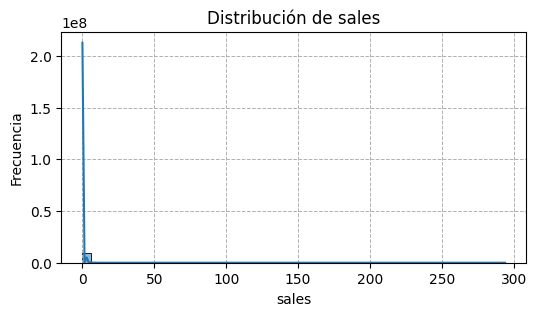

In [26]:
plt.figure(figsize=(6,3))
sns.histplot(sales['sales'], kde=True, bins=50)
plt.title('Distribución de sales')
plt.xlabel('sales')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

In [27]:
pd.value_counts(sales['item_id'])

/var/folders/72/kf09dnsd1wb18f08628cdsxm0000gn/T/ipykernel_2078/1093102846.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(sales['item_id'])


item_id
HOBBIES_1_001    19410
HOBBIES_1_332    19410
HOBBIES_1_362    19410
HOBBIES_1_361    19410
HOBBIES_1_360    19410
                 ...  
HOBBIES_1_171    19410
HOBBIES_1_170    19410
HOBBIES_1_169    19410
HOBBIES_1_168    19410
HOBBIES_2_100    19410
Name: count, Length: 516, dtype: int64

- Evolución semanal de las ventas totales por producto:

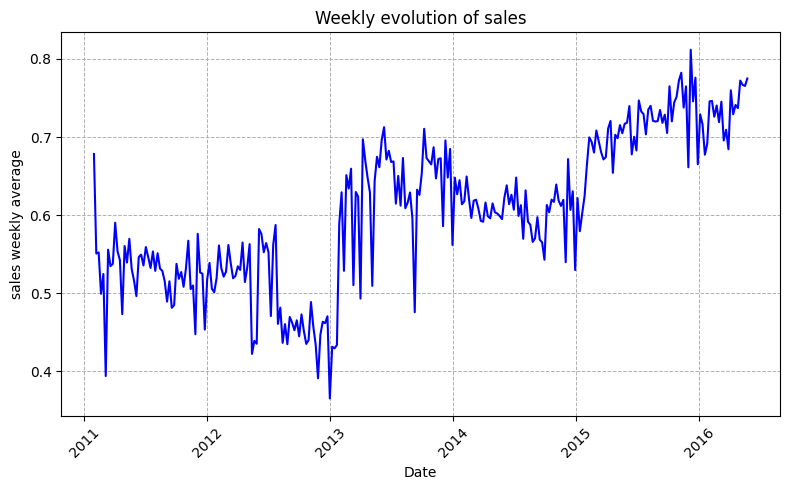

In [28]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por semana y calcular el promedio de las ventas
sales_semanal = sales.resample('W', on='date')['sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['sales'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of sales')
plt.xlabel('Date')
plt.ylabel('sales weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Evolución semanal por referencia

- Comentarios sobre la columna:

### `Sell_price`

In [29]:
print(sales.sell_price.describe())
print(f'Median: {sales.sell_price.median()}')
print(f'Mode: {sales.sell_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.sell_price) - min(sales.sell_price)
print(f"Rango: {range_}")

count   10015560.0000
mean           5.8508
std            5.2959
min            0.0100
25%            1.9700
50%            4.2400
75%            8.2600
max           30.9800
Name: sell_price, dtype: float64
Median: 4.24
Mode: 0.97
Rango: 30.97


- Valores nulos:

In [30]:
print(sales.sell_price.isnull().sum())

0


- Valores unicos:

In [32]:
print(sales.sell_price.nunique())

581


- Confirmación del tipo de datos de la columna:

In [33]:
sales.sell_price.dtype

dtype('float64')

- Distribución:

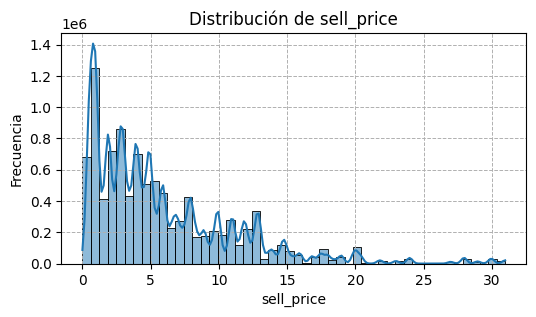

In [34]:
plt.figure(figsize=(6,3))
sns.histplot(sales['sell_price'], kde=True, bins=50)
plt.title('Distribución de sell_price')
plt.xlabel('sell_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Weekly evolution of sell_price:

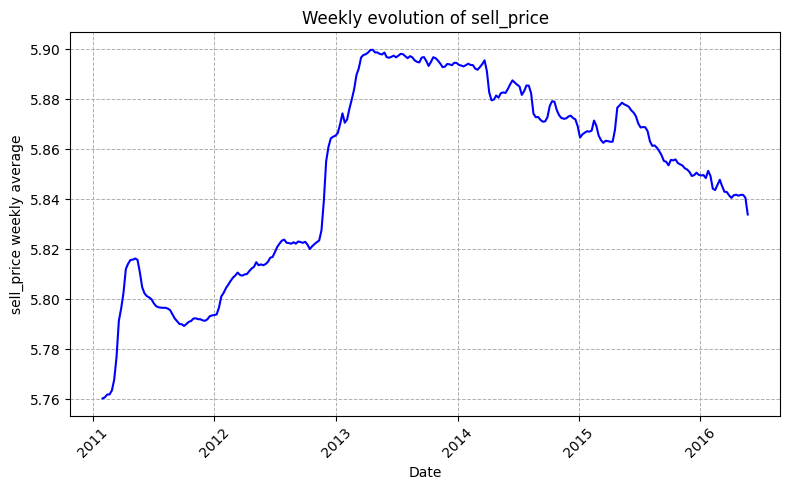

In [35]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['sell_price'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['sell_price'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of sell_price')
plt.xlabel('Date')
plt.ylabel('sell_price weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

### `scaled_sell_price`

In [36]:
print(sales.scaled_sell_price.describe())
print(f'Median: {sales.scaled_sell_price.median()}')
print(f'Mode: {sales.scaled_sell_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.scaled_sell_price) - min(sales.scaled_sell_price)
print(f"Rango: {range_}")

count   10015560.0000
mean          -0.0000
std            1.0000
min           -1.1029
25%           -0.7328
50%           -0.3042
75%            0.4549
max            4.7451
Name: scaled_sell_price, dtype: float64
Median: -0.3041625568307898
Mode: -0.9216245763290232
Rango: 5.847950686195804


- Valores nulos:

In [37]:
print(sales.scaled_sell_price.isnull().sum())

0


- Valores unicos:

In [38]:
print(sales.scaled_sell_price.nunique())

581


- Confirmación del tipo de datos de la columna:

In [39]:
sales.scaled_sell_price.dtype

dtype('float64')

- Distribución:

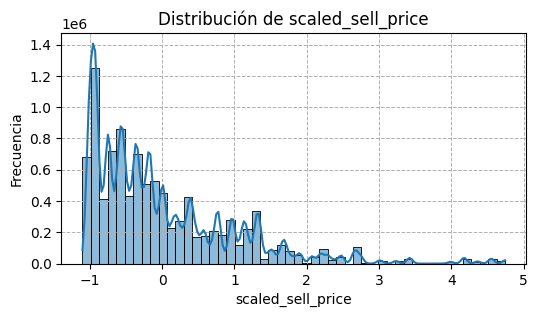

In [40]:
plt.figure(figsize=(6,3))
sns.histplot(sales['scaled_sell_price'], kde=True, bins=50)
plt.title('Distribución de scaled_sell_price')
plt.xlabel('scaled_sell_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

### `pi_mean`

In [41]:
print(sales.pi_mean.describe())
print(f'Median: {sales.pi_mean.median()}')
print(f'Mode: {sales.pi_mean.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.pi_mean) - min(sales.pi_mean)
print(f"Rango: {range_}")

count   10015560.0000
mean    15647803.6729
std     14204231.0780
min      3330011.1143
25%      3777542.6571
50%      4951336.9803
75%     31739400.8793
max     37778241.5690
Name: pi_mean, dtype: float64
Median: 4951336.980314961
Mode: 31289017.827586208
Rango: 34448230.4546798


- Valores nulos:

In [42]:
print(sales.pi_mean.isnull().sum())

0


- Valores unicos:

In [43]:
print(sales.pi_mean.nunique())

18


- Confirmación del tipo de datos de la columna:

In [44]:
sales.pi_mean.dtype

dtype('float64')

- Distribución:

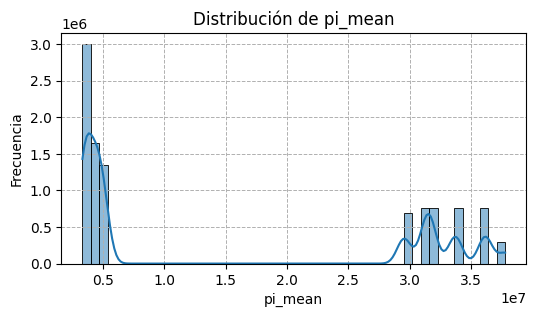

In [45]:
plt.figure(figsize=(6,3))
sns.histplot(sales['pi_mean'], kde=True, bins=50)
plt.title('Distribución de pi_mean')
plt.xlabel('pi_mean')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Weekly evolution of pi_mean:

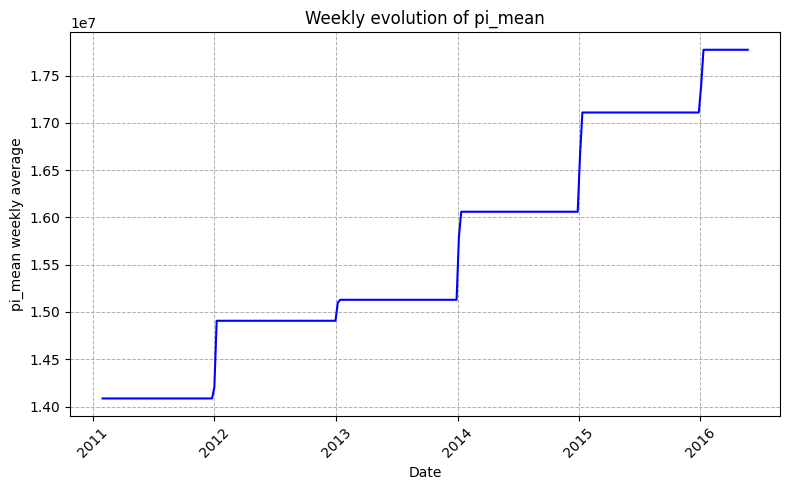

In [46]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['pi_mean'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['pi_mean'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of pi_mean')
plt.xlabel('Date')
plt.ylabel('pi_mean weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

### `poblacion`

In [47]:
print(sales.poblacion.describe())
print(f'Median: {sales.poblacion.median()}')
print(f'Mode: {sales.poblacion.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.poblacion) - min(sales.poblacion)
print(f"Rango: {range_}")

count   10015560.0000
mean    25053480.8868
std     13550778.6615
min      5705288.0000
25%      5760940.0000
50%     26964333.0000
75%     38260787.0000
max     39167117.0000
Name: poblacion, dtype: float64
Median: 26964333.0
Mode: 37948800.0
Rango: 33461829.0


- Valores nulos:

In [48]:
print(sales.poblacion.isnull().sum())

0


- Valores unicos:

In [49]:
print(sales.poblacion.nunique())

18


- Confirmación del tipo de datos de la columna:

In [50]:
sales.poblacion.dtype

dtype('float64')

- Distribución:

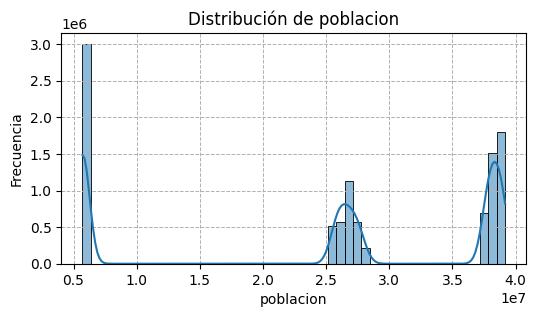

In [51]:
plt.figure(figsize=(6,3))
sns.histplot(sales['poblacion'], kde=True, bins=50)
plt.title('Distribución de poblacion')
plt.xlabel('poblacion')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

### `Crecimiento_p`

In [52]:
print(sales.Crecimiento_p.describe())
print(f'Median: {sales.Crecimiento_p.median()}')
print(f'Mode: {sales.Crecimiento_p.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Crecimiento_p) - min(sales.Crecimiento_p)
print(f"Rango: {range_}")

count   10015560.0000
mean           0.8874
std            0.5797
min            0.1600
25%            0.2900
50%            0.8200
75%            1.5200
max            1.8800
Name: Crecimiento_p, dtype: float64
Median: 0.82
Mode: 0.82
Rango: 1.72


- Valores nulos:

In [53]:
print(sales.Crecimiento_p.isnull().sum())

0


- Valores unicos:

In [54]:
print(sales.Crecimiento_p.nunique())

16


- Confirmación del tipo de datos de la columna:

In [55]:
sales.Crecimiento_p.dtype

dtype('float64')

- Distribución:

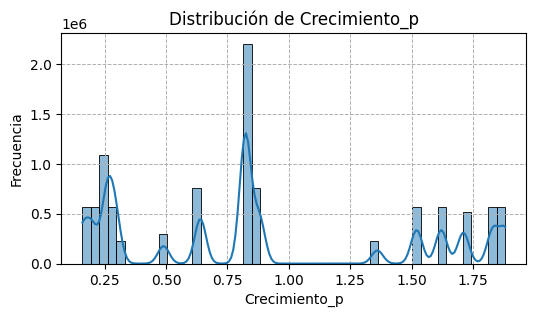

In [56]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Crecimiento_p'], kde=True, bins=50)
plt.title('Distribución de Crecimiento_p')
plt.xlabel('Crecimiento_p')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

### `pib_por_estado`

In [57]:
print(sales.pib_por_estado.describe())
print(f'Median: {sales.pib_por_estado.median()}')
print(f'Mode: {sales.pib_por_estado.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.pib_por_estado) - min(sales.pib_por_estado)
print(f"Rango: {range_}")

count   10015560.0000
mean      498451.7860
std       287506.5130
min        96791.9000
25%       105319.8333
50%       524914.8000
75%       763891.7000
max       866869.7000
Name: pib_por_estado, dtype: float64
Median: 524914.7999999999
Mode: 729999.7666666666
Rango: 770077.8


- Valores nulos:

In [58]:
print(sales.pib_por_estado.isnull().sum())

0


- Valores unicos:

In [59]:
print(sales.pib_por_estado.nunique())

66


- Confirmación del tipo de datos de la columna:

In [60]:
sales.pib_por_estado.dtype

dtype('float64')

- Distribución:

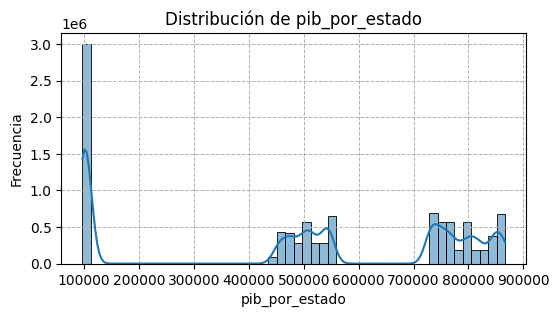

In [61]:
plt.figure(figsize=(6,3))
sns.histplot(sales['pib_por_estado'], kde=True, bins=50)
plt.title('Distribución de pib_por_estado')
plt.xlabel('pib_por_estado')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Weekly evolution of rpc

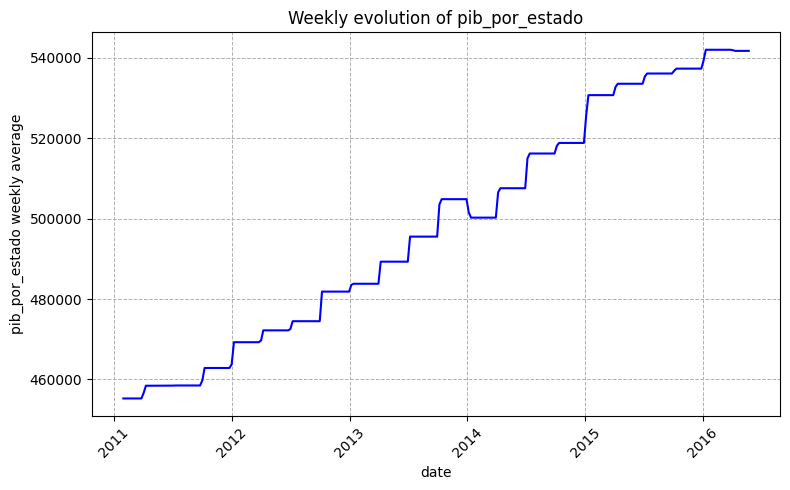

In [62]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['pib_por_estado'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['pib_por_estado'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of pib_por_estado')
plt.xlabel('date')
plt.ylabel('pib_por_estado weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

### `wti`

In [63]:
print(sales.wti.describe())
print(f'Median: {sales.wti.median()}')
print(f'Mode: {sales.wti.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.wti) - min(sales.wti)
print(f"Rango: {range_}")

count   10015560.0000
mean          82.1679
std           23.6296
min           26.2100
25%           59.3720
50%           93.0343
75%           99.6000
max          113.9300
Name: wti, dtype: float64
Median: 93.03428571428572
Mode: 31.77578947368421
Rango: 87.72


- Valores nulos:

In [64]:
print(sales.wti.isnull().sum())

0


- Valores unicos:

In [65]:
print(sales.wti.nunique())

1235


- Confirmación del tipo de datos de la columna:

In [66]:
sales.wti.dtype

dtype('float64')

- Distribución:

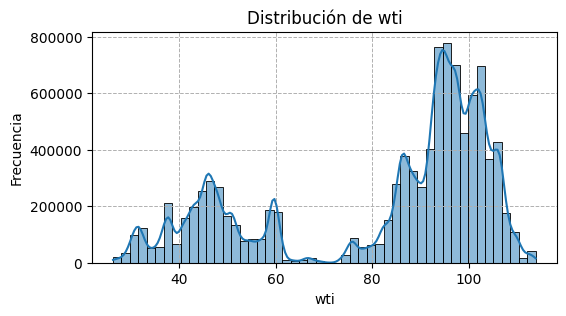

In [67]:
plt.figure(figsize=(6,3))
sns.histplot(sales['wti'], kde=True, bins=50)
plt.title('Distribución de wti')
plt.xlabel('wti')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Daily evolution of wti

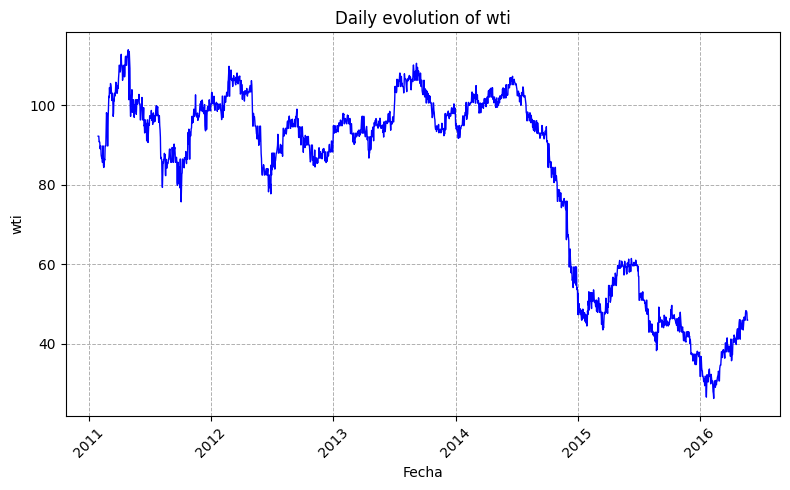

In [68]:

sales['date'] = pd.to_datetime(sales['date'])  # Asegurate de que sales['Date'] sea tipo datetime

plt.figure(figsize=(8, 5))
plt.plot(sales['date'], sales['wti'], color='blue', linestyle='-', marker='', linewidth=1)
plt.title('Daily evolution of wti')
plt.xlabel('Fecha')
plt.ylabel('wti')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

### `riqueza_per_capita`

In [69]:
print(sales.riqueza_per_capita.describe())
print(f'Median: {sales.riqueza_per_capita.median()}')
print(f'Mode: {sales.riqueza_per_capita.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.riqueza_per_capita) - min(sales.riqueza_per_capita)
print(f"Rango: {range_}")

count   10015560.0000
mean       15462.7250
std         1225.4356
min        13536.6667
25%        14539.3333
50%        15277.0000
75%        15976.3333
max        18491.0000
Name: riqueza_per_capita, dtype: float64
Median: 15277.0
Mode: 15242.0
Rango: 4954.333333333334


- Valores nulos:

In [70]:
print(sales.riqueza_per_capita.isnull().sum())

0


- Valores unicos:

In [71]:
print(sales.riqueza_per_capita.nunique())

66


- Confirmación del tipo de datos de la columna:

In [72]:
sales.riqueza_per_capita.dtype

dtype('float64')

- Distribución:

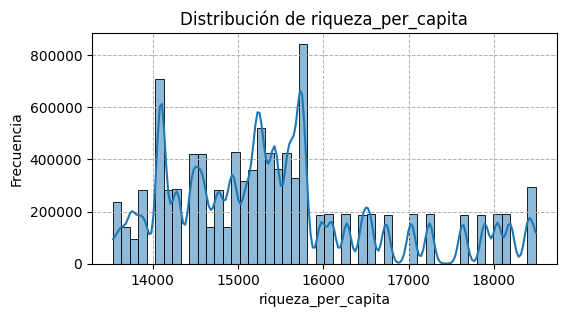

In [73]:
plt.figure(figsize=(6,3))
sns.histplot(sales['riqueza_per_capita'], kde=True, bins=50)
plt.title('Distribución de riqueza_per_capita')
plt.xlabel('riqueza_per_capita')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna: